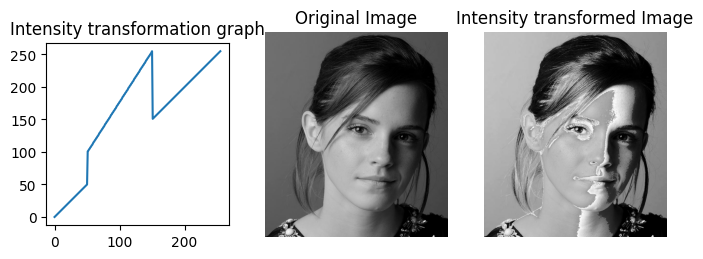

In [23]:
#q1
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread("emma.jpg",cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0,50,51).astype('uint8')
t2 = np.linspace(101,255,100).astype('uint8')
t3 = np.linspace(151,255,105).astype('uint8')

trsfm = np.concatenate((t1,t2,t3),axis=0).astype('uint8')
assert len(trsfm)==256
g = cv.LUT(f,trsfm)

fig, ax = plt.subplots(1,3,figsize=(8,8))
ax[0].plot(trsfm), ax[0].set_title("Intensity transformation graph"), ax[0].set_aspect('equal')
ax[1].imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB)), ax[1].axis('off'), ax[1].set_title("Original Image")
ax[2].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB)), ax[2].axis('off'), ax[2].set_title("Intensity transformed Image")
plt.show()


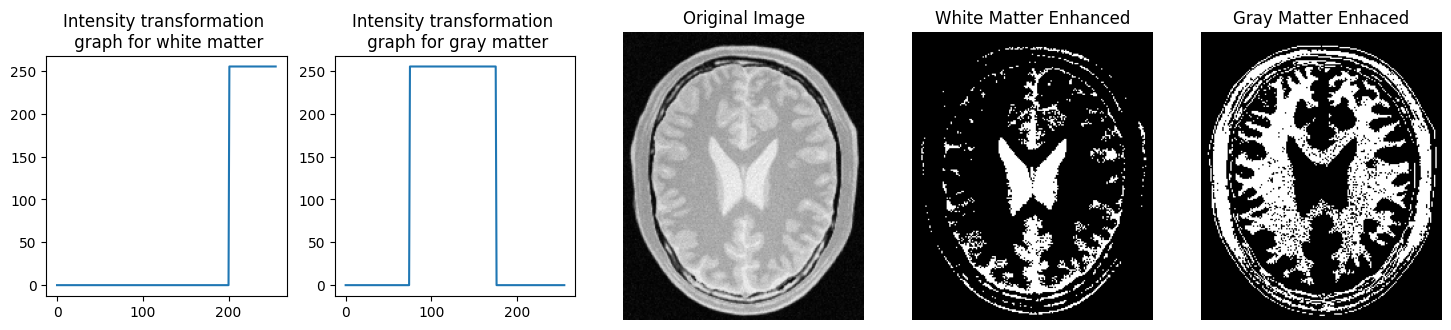

In [47]:
#q2
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f = cv.imread("BrainProtonDensitySlice9.png",cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0,0,201).astype('uint8')
t2 = np.linspace(255,255,55).astype('uint8')
t3 = np.linspace(0,0,75).astype('uint8')
t4 = np.linspace(255,255,101).astype('uint8')
t5 = np.linspace(0,0,80).astype('uint8')

t = np.concatenate((t1,t2),axis=0).astype('uint8')
s = np.concatenate((t3,t4,t5),axis=0).astype('uint8')

assert len(t)==256
assert len(s)==256
g = cv.LUT(f,t)
h = cv.LUT(f,s)

fig, ax = plt.subplots(1,5,figsize=(18,18))
ax[0].plot(t), ax[0].set_aspect('equal'), ax[0].set_title("Intensity transformation \n graph for white matter")
ax[1].plot(s), ax[1].set_aspect('equal'), ax[1].set_title("Intensity transformation \n graph for gray matter")
ax[2].imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB)), ax[2].axis('off'), ax[2].set_title("Original Image")
ax[3].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB)), ax[3].axis('off'), ax[3].set_title("White Matter Enhanced") 
ax[4].imshow(cv.cvtColor(h,cv.COLOR_BGR2RGB)), ax[4].axis('off'), ax[4].set_title("Gray Matter Enhaced")
plt.show()

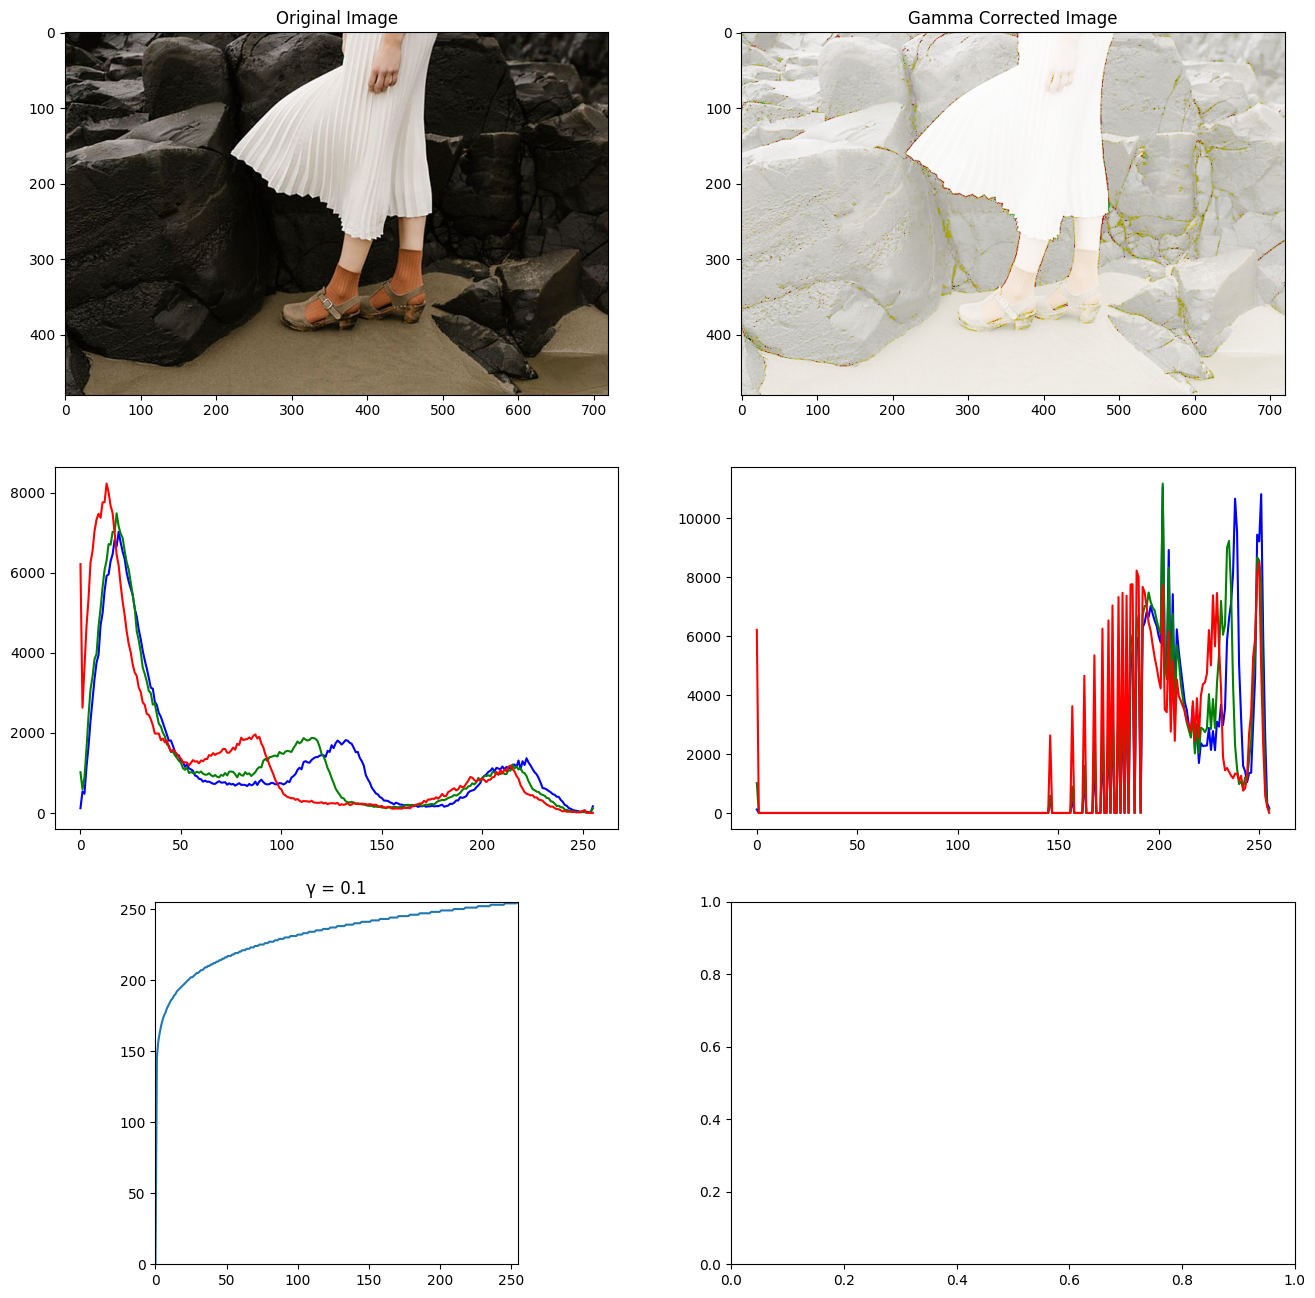

In [4]:
#q3
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('highlights_and_shadows.jpg', cv.IMREAD_COLOR)

gamma = 0.1

table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_gamma = cv.LUT(img, table)
img_orig = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_BGR2RGB)
f, axarr = plt.subplots(3,2, figsize=(16,16))

axarr[0,0].imshow(img_orig)
axarr[0,0].set_title('Original Image')
axarr[0,1].imshow(img_gamma)
axarr[0,1].set_title('Gamma Corrected Image')

colors = ('b', 'g', 'r')
for i, c in enumerate(colors):
    hist_orig = cv.calcHist([img_orig], [i], None, [256], [0,256])
    axarr[1,0].plot(hist_orig, color = c)
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0,256])
    axarr[1,1].plot(hist_gamma, color = c)    
axarr[2,0].plot(table)
axarr[2,0].set_title("\u03B3 = "+ str(gamma))
axarr[2,0].set_xlim(0,255)
axarr[2,0].set_ylim(0,255)
axarr[2,0].set_aspect('equal')

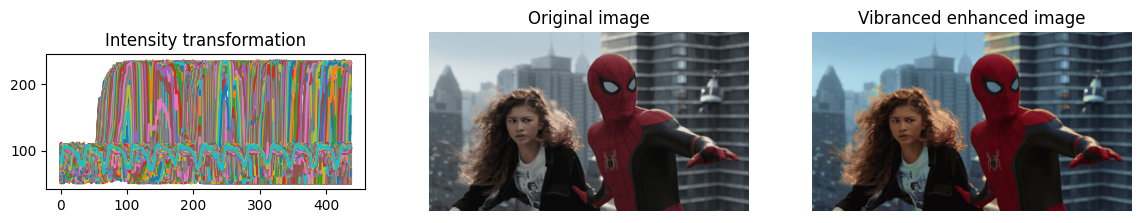

In [1]:
#q4
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('spider.png',cv.IMREAD_COLOR)

#(a)
h, s, v = cv.split(cv.cvtColor(img, cv.COLOR_BGR2HSV))

#(b),(c)
sigma = 70
a = 0.4  #alpha = 0.4 gives a pleasing image
fx = np.array(np.minimum(s + a*128*np.exp(-((s-128)**2)/(2*(sigma**2))), 255)).astype('uint8')

#(d)
trnsf_hsv = cv.merge([h, fx, v])

#(e)
fig, ax = plt.subplots(1,3,figsize=(14,14))
ax[0].plot(fx), ax[0].set_title("Intensity transformation"), ax[0].set_aspect('equal')
ax[1].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), ax[1].axis('off'), ax[1].set_title("Original image")
ax[2].imshow(cv.cvtColor(trnsf_hsv,cv.COLOR_HSV2RGB)), ax[2].axis('off'), ax[2].set_title("Vibranced enhanced image")
plt.show()

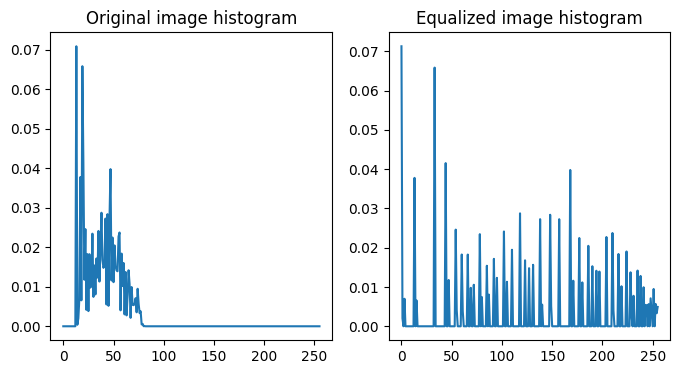

In [1]:
#q5
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

image = cv.imread('shells.tif', cv.IMREAD_GRAYSCALE)
equalized_image = cv.equalizeHist(image)

hist_original, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
hist_equalized, _ = np.histogram(equalized_image.flatten(), bins=256, range=[0, 256])
hist_original = hist_original / hist_original.sum()
hist_equalized = hist_equalized / hist_equalized.sum()

fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(hist_original), ax[0].set_title("Original image histogram")
ax[1].plot(hist_equalized), ax[1].set_title("Equalized image histogram")
plt.show()

cv.imshow("Original", image)
cv.imshow("Equalized", equalized_image)
cv.waitKey(0)
cv.destroyAllWindows()

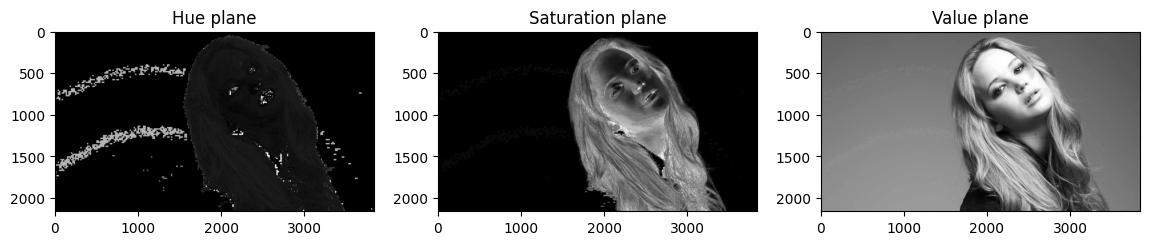

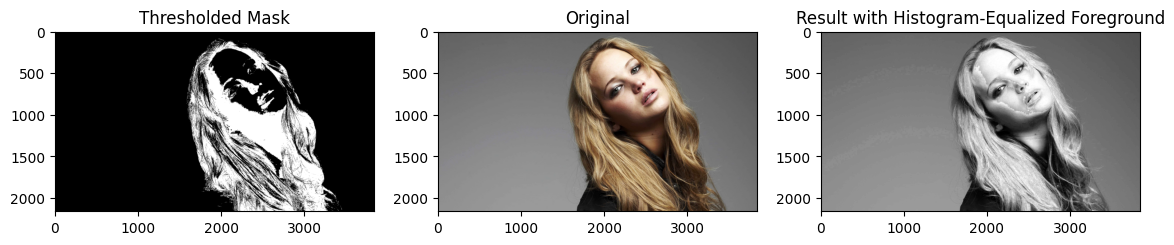

In [14]:
#q6
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load the image
img = cv.imread('jeniffer.jpg')

# (a)
h, s, v = cv.split(cv.cvtColor(img, cv.COLOR_BGR2HSV))

fig, ax = plt.subplots(1, 3, figsize=(14, 14))
ax[0].imshow(h, cmap='gray')
ax[0].set_title("Hue plane")
ax[1].imshow(s, cmap='gray')
ax[1].set_title("Saturation plane")
ax[2].imshow(v, cmap='gray')
ax[2].set_title("Value plane")

# (b) I'll use the saturation (s) plane for thresholding
_, thresholded_mask = cv.threshold(s, 100, 255, cv.THRESH_BINARY)

# (c)
foreground = cv.bitwise_and(v, thresholded_mask)

# (d)
hist_foreground = cv.calcHist([foreground], [0], thresholded_mask, [256], [0, 256])
cumulative_hist = np.cumsum(hist_foreground)

# (e)
equalized_foreground = cv.equalizeHist(foreground)

# (f)
background = cv.bitwise_not(thresholded_mask)
background_image = cv.bitwise_and(v, background)

# Add the equalized foreground with the background
result_value = cv.add(equalized_foreground, background_image)

# Display results
fig, ax = plt.subplots(1, 3, figsize=(14, 14))
ax[0].imshow(thresholded_mask, cmap='gray')
ax[0].set_title("Thresholded Mask")
ax[1].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[1].set_title("Original")
ax[2].imshow(result_value, cmap='gray')
ax[2].set_title("Result with Histogram-Equalized Foreground")
plt.show()


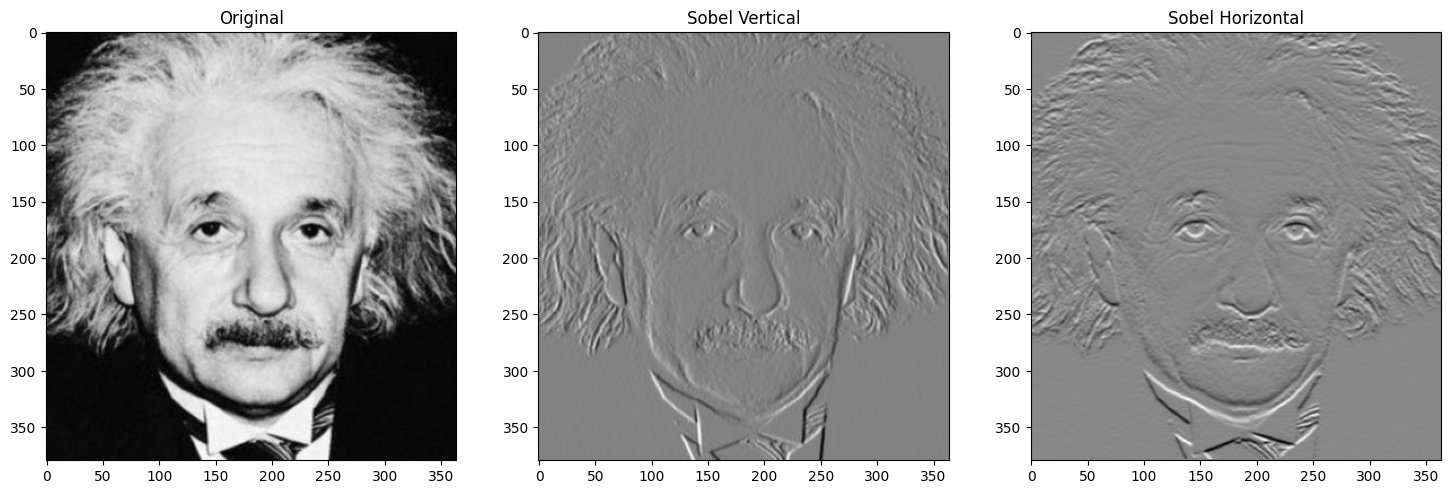

In [6]:
#q7 (a)
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('einstein.png',cv.IMREAD_GRAYSCALE).astype(np.float32)

# Sobel vertical
kv = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float')
img_sobel_v = cv.filter2D(img, -1, kv)

# Sobel horizontal
kh = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype='float')
img_sobel_h = cv.filter2D(img, -1, kh)

fig, axes  = plt.subplots(1, 3, figsize=(18,9))
axes[0].imshow(img, cmap='gray'), axes[0].set_title('Original')
axes[1].imshow(img_sobel_h, cmap='gray'), axes[1].set_title('Sobel Vertical')
axes[2].imshow(img_sobel_v, cmap='gray'), axes[2].set_title('Sobel Horizontal')
plt.show()

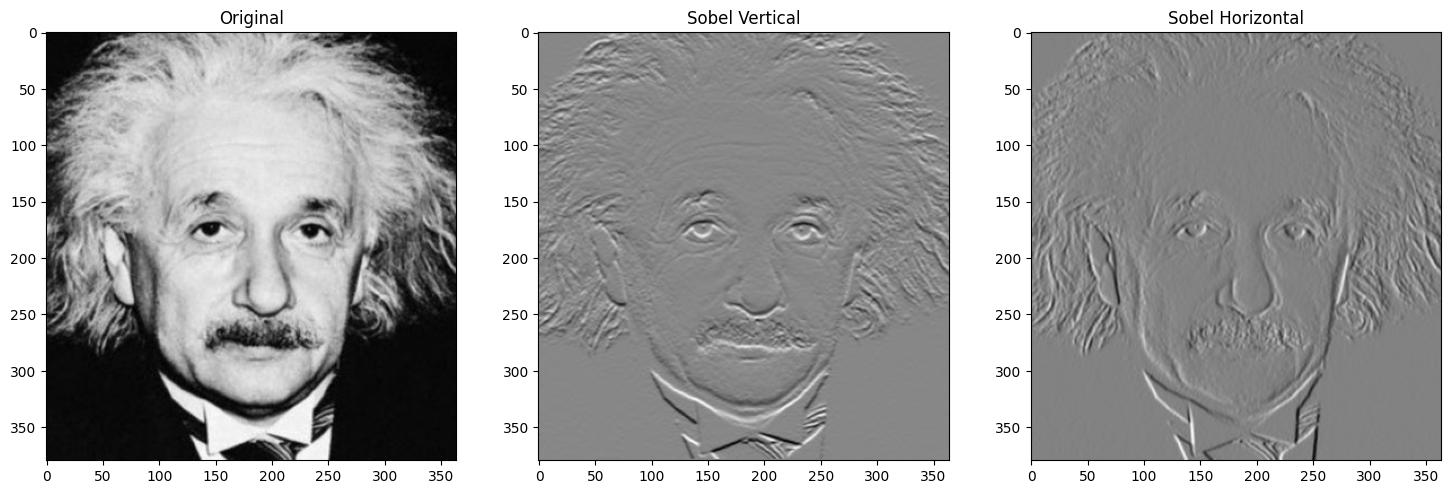

In [9]:
#q7 (b)
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

img= cv.imread("einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)
img_sobel_v = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)
img_sobel_h = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)

fig, axes  = plt.subplots(1, 3, figsize=(18,9))
axes[0].imshow(img, cmap='gray'), axes[0].set_title('Original')
axes[1].imshow(img_sobel_v, cmap='gray'), axes[1].set_title('Sobel Vertical')
axes[2].imshow(img_sobel_h, cmap='gray'), axes[2].set_title('Sobel Horizontal')
plt.show()

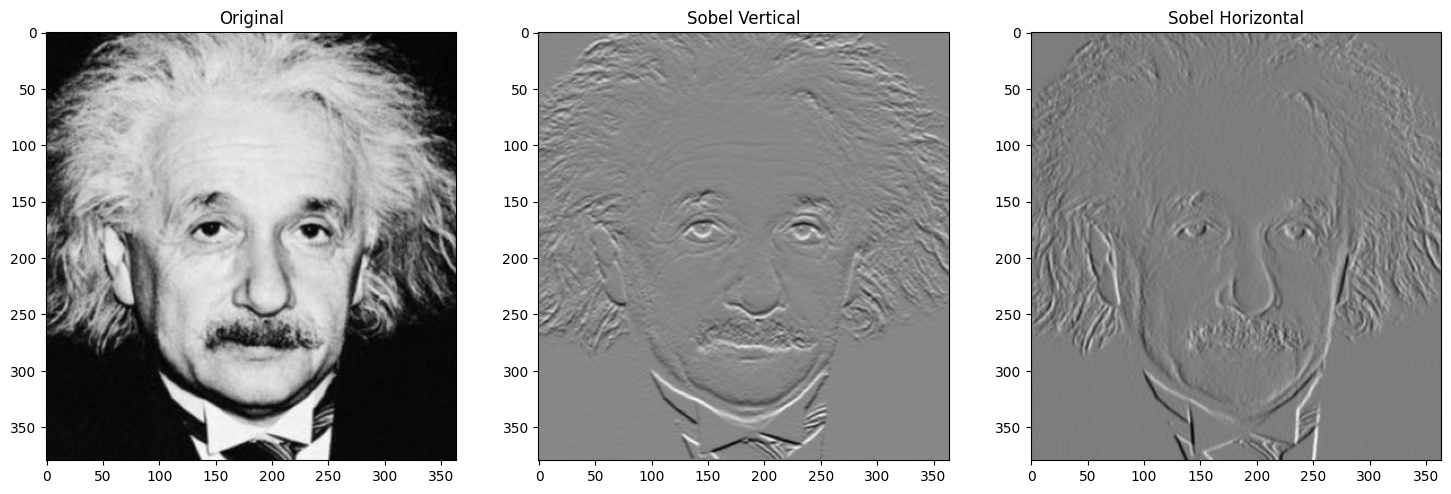

In [10]:
#q7 (c)
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread("einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)
kh = np.array([1,2,1], dtype=np.float32)
kv = np.array([1,0,-1], dtype=np.float32)
img_sobel_vimg_sobel_v = cv.sepFilter2D(img, -1, kh, kv)
img_sobel_h = cv.sepFilter2D(img, -1, kv, kh)

fig, axes  = plt.subplots(1, 3, figsize=(18,9))
axes[0].imshow(img, cmap='gray'), axes[0].set_title('Original')
axes[1].imshow(img_sobel_v, cmap='gray'), axes[1].set_title('Sobel Vertical')
axes[2].imshow(img_sobel_h, cmap='gray'), axes[2].set_title('Sobel Horizontal')
plt.show()

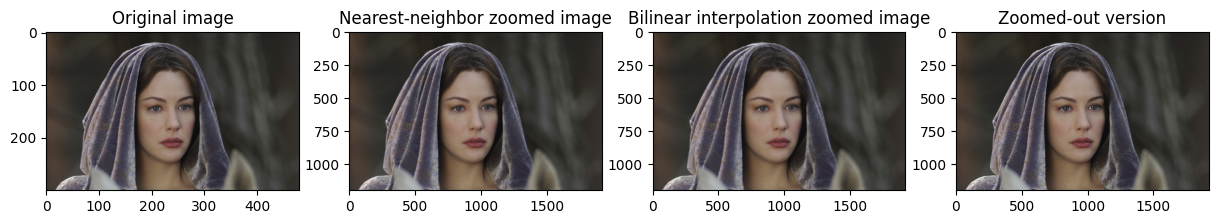

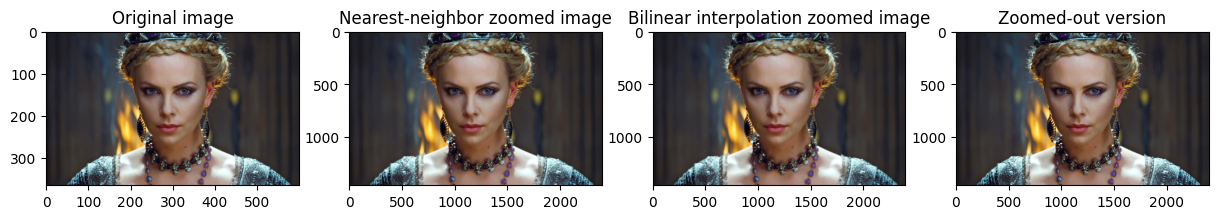

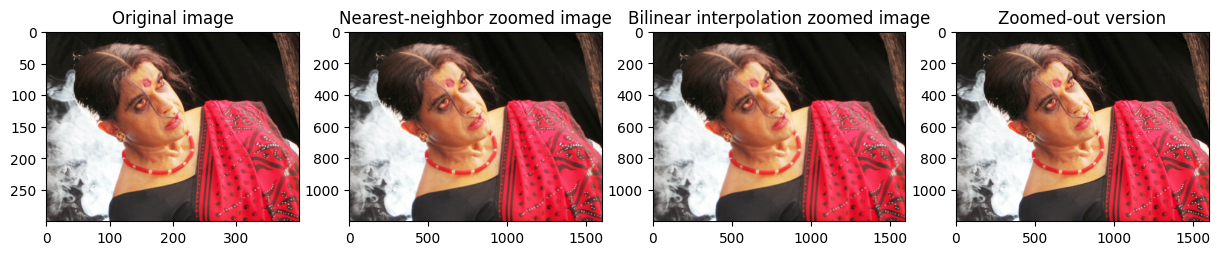

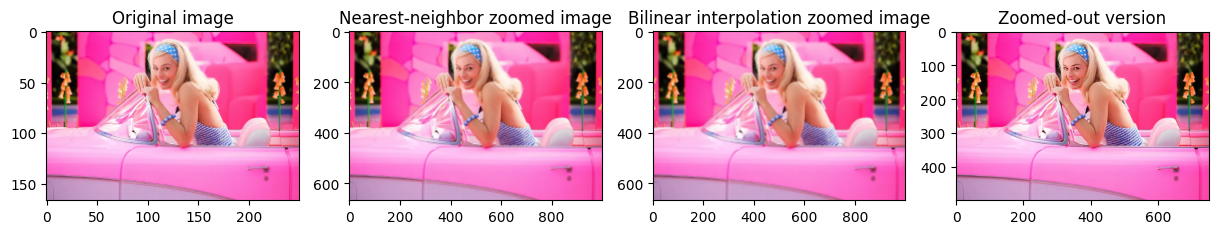

In [14]:
#q8
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

originals = ["im02small.png", "im03small.png", "im09small.png","im11small.png"]
zoom_outs = ["im02.png", "im03.png", "im09.png", "im11.png"]

for i in range(4):
    img = cv.imread(originals[i])
    img_zoom_out = cv.imread(zoom_outs[i])

    img_near = cv.resize(img, None, fx=4, fy=4, interpolation=cv.INTER_NEAREST)
    img_bilinear = cv.resize(img, None, fx=4, fy=4, interpolation=cv.INTER_LINEAR)

    fig, ax = plt.subplots(1,4, figsize=(15,15))
    ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), ax[0].set_title("Original image")
    ax[1].imshow(cv.cvtColor(img_near,cv.COLOR_BGR2RGB)), ax[1].set_title("Nearest-neighbor zoomed image")
    ax[2].imshow(cv.cvtColor(img_bilinear,cv.COLOR_BGR2RGB)), ax[2].set_title("Bilinear interpolation zoomed image")
    ax[3].imshow(cv.cvtColor(img_zoom_out ,cv.COLOR_BGR2RGB)), ax[3].set_title("Zoomed-out version")
    plt.show()

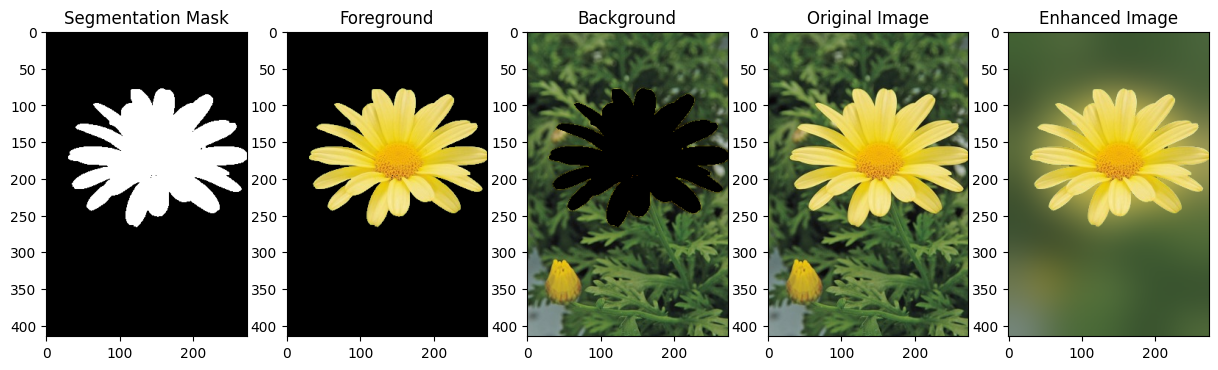

In [29]:
#q9
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

image = cv.imread('flower.jpg')

#(a)
segment_mask = np.zeros(image.shape[:2], np.uint8)
rect = (30, 30, image.shape[1] - 30, image.shape[0] - 150)
background = np.zeros((1, 65), np.float64)
foreground = np.zeros((1, 65), np.float64)
cv.grabCut(image, segment_mask, rect, background, foreground, 5, cv.GC_INIT_WITH_RECT)
mask2 = np.where((segment_mask == 2) | (segment_mask == 0), 0, 1).astype('uint8')
segmented_image = image * mask2[:, :, np.newaxis]

fig, ax = plt.subplots(1,5, figsize = (15,15))
ax[0].imshow(mask2, cmap='gray'), ax[0].set_title('Segmentation Mask')
ax[1].imshow(cv.cvtColor(segmented_image,cv.COLOR_BGR2RGB)), ax[1].set_title('Foreground')
ax[2].imshow(cv.cvtColor(image - segmented_image,cv.COLOR_BGR2RGB)), ax[2].set_title('Background')

#(b)
blurred_background = cv.GaussianBlur(image, (0, 0), 30)
enhanced_image = np.where(mask2[:, :, np.newaxis] == 1, image, blurred_background)

ax[3].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)), ax[3].set_title('Original Image')
ax[4].imshow(cv.cvtColor(enhanced_image, cv.COLOR_BGR2RGB)), ax[4].set_title('Enhanced Image')
plt.show()